## This notebook contains analysis, tables and figures in the paper

In [1]:
import sys
sys.path.append("../code/")

import config

%matplotlib inline
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import seaborn as sns
import glob
sns.set_context("paper")
sns.set_style("white")

import re
import os
from collections import defaultdict

## Data loading and preparation


In [14]:
lang = "JS"

adoption_file = config.FINAL_DATA+"cleaned_{0}_adoption_final.csv"
release_file = config.FINAL_DATA+"cleaned_{0}_release_final.csv"
opts = {"na_filter": False}
#%%

df_adoption =  pd.read_csv(adoption_file.format(lang), **opts)
df_release =  pd.read_csv(release_file.format(lang), **opts)

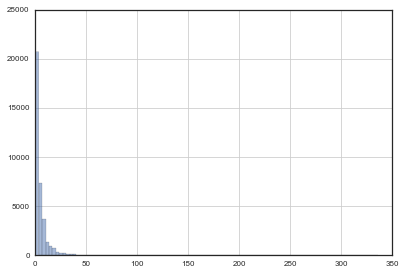

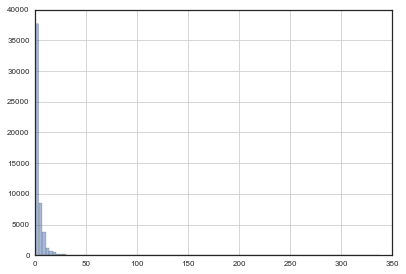

In [3]:
df_fixed = pd.read_csv("../data/working/fixed_adopted_{0}_meta.csv".format(lang), sep="\t")
df_fixed.groupby(["project_github", "project_ver","adopted_name", "orig_ver_string", "commit_ts"]).count().reset_index().head()

plt.figure()
df_fixed.groupby(["project_github", "adopted_name", "orig_ver_string"]).count().reset_index()["project_ver"].hist(bins=100,alpha=0.5)
plt.show()
plt.figure()
df_fixed.groupby(["project_github", "adopted_name", "adopted_ver"]).count().reset_index()["project_ver"].hist(bins=100, alpha=0.5)
plt.show()

In [4]:
df_fixed.query("adopted_name == 'lodash' and adopted_ver == '2.4.1'").sort_values(["project_name", "project_ver", "is_published"])

,project_github,project_name,commit_ts,project_ver,adopted_name,orig_ver_string,is_published,release_ts_x,adopted_ver,adopted_github,release_ts_y


# Basic statistics

In [5]:
print df_adoption.head()
print df_release.head()
print "Unique projects", df_release.project_name.value_counts().shape

#df_release.head()

#print df_release.groupby("project_name").count().reset_index().mean()

    project_github project_name project_ver adopted_name   commit_ts  \
0  0X1A/core-utils   core-utils       0.1.0    ansi_term  1433523708   
1  0X1A/core-utils   core-utils       0.1.0      getopts  1433523708   
2  0X1A/core-utils   core-utils       0.1.0     num_cpus  1433523708   
3  0X1A/core-utils   core-utils       0.1.0         term  1432311903   
4  0X1A/core-utils   core-utils       0.1.1    ansi_term  1434042038   

  adopted_ver  is_published  
0       0.5.2             1  
1      0.2.11             1  
2       0.2.5             1  
3       0.2.7             1  
4       0.6.1             1  
       project_github project_name project_ver  release_ts  is_published
0  dmisiuk/test_hyper   test_hyper       0.1.0  1432652854             1
1       brayniac/mpmc         mpmc       0.1.0  1446157648             1
2       brayniac/mpmc         mpmc       0.1.2  1458765252             1
3       brayniac/mpmc         mpmc       0.1.1  1447581850             1
4      aatxe/rustlike 

In [6]:
def get_max_rows(df):
    commit_ts_maxes = df.groupby('project_name').commit_ts.transform(max)
    return df[df.commit_ts == commit_ts_maxes] 

maxed = get_max_rows(df_adoption)

print maxed.head()

     project_github project_name project_ver adopted_name   commit_ts  \
9   0X1A/core-utils   core-utils       0.1.2     num_cpus  1439838594   
10  0X1A/core-utils   core-utils       0.1.2     pgetopts  1439838594   
11  0X1A/core-utils   core-utils       0.1.2          rpf  1439838594   
15         0X1A/mpm          mpm       0.1.0        libpm  1458240468   
16         0X1A/mpm          mpm       0.1.0     pgetopts  1458240468   

   adopted_ver  is_published  
9        0.2.6             1  
10       0.1.2             1  
11       0.1.3             1  
15         git             1  
16         0.1             1  


# Evolution

In [7]:
evolution = pd.read_csv("../data/results/{0}Exp-stats-regular.tsv".format(lang),sep="\t",
                        skiprows=0,header=None,na_values="",  index_col=False,
                        names=["timestamp", "nodes","unique_relations","count", "version_relations", "unique"])

evolution["date"] = pd.to_datetime(evolution.timestamp,unit='s')
evolution["date"] = pd.DatetimeIndex(evolution.date).normalize()
evolution  = evolution[evolution.nodes>0].sort_values("date")


evolution_ver = pd.read_csv("../data/results/{0}Exp-stats-vernode.tsv".format(lang),sep="\t",
                        skiprows=0,header=None,na_values="",  index_col=False,
                        names=["timestamp", "nodes","version_relations"])
evolution_ver["date"] = pd.to_datetime(evolution_ver.timestamp,unit='s')
evolution_ver["date"] = pd.DatetimeIndex(evolution_ver.date).normalize()
evolution_ver  = evolution_ver[evolution_ver.nodes>0].sort_values("date")

In [8]:
evolution[["date", "nodes", "unique_relations", "version_relations", "unique"]].to_latex("../paper/tables/evolution_regular_{0}.tex".format(lang))
evolution_ver[["date", "nodes", "version_relations"]].to_latex("../paper/tables/evolution_ver_{0}.tex".format(lang))

In [16]:
regular = pd.read_csv("../data/results/generated-regular-simulation-{0}.csv".format(lang))
vernode = pd.read_csv("../data/results/generated-vernode-simulation-{0}.csv".format(lang))

# Fragility and Spreading


unique_spreading
               project_name project_github    size  max_depth  unique  \
1336         rust-lang/libc           libc  4974.0        4.0  4700.0   
7967         rust-lang/libc           libc  4974.0        4.0  4700.0   
6616         rust-lang/libc           libc  4220.0        4.0  4214.0   
5704  rust-lang-nursery/log            log  3429.0        4.0  4133.0   
1973  rust-lang-nursery/log            log  3429.0        4.0  4133.0   

      indegree  outdegree       date  
1336    1154.0        0.0 2016-05-29  
7967    1154.0        0.0 2016-08-27  
6616    1028.0        0.0 2016-02-29  
5704     953.0        4.0 2016-05-29  
1973     953.0        4.0 2016-08-27  
None


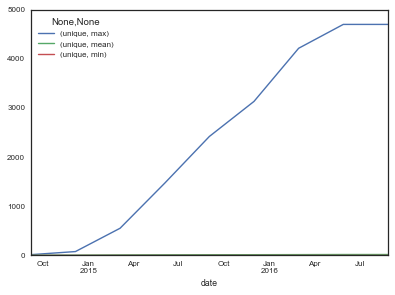

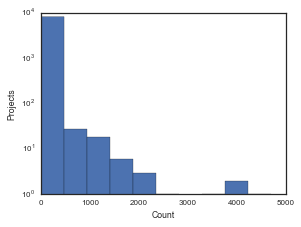

unique_vulnerability
                            project_name   project_github project_ver    size  \
18569  rust-lang-nursery/rustc-serialize  rustc-serialize      0.3.16  1716.0   
6293   rust-lang-nursery/rustc-serialize  rustc-serialize      0.3.16  1716.0   
11140  rust-lang-nursery/rustc-serialize  rustc-serialize      0.3.16  1514.0   
13750                     rust-lang/libc             libc       0.2.1  1190.0   
9712                      rust-lang/libc             libc       0.2.8  1033.0   

       max_depth  unique  indegree  outdegree       date  
18569        4.0  1715.0    1693.0        0.0 2016-08-27  
6293         4.0  1715.0    1693.0        0.0 2016-05-29  
11140        5.0  1513.0    1595.0        0.0 2016-02-29  
13750        5.0  1189.0     136.0        0.0 2016-02-29  
9712         8.0  1032.0     193.0        0.0 2016-08-27  
None


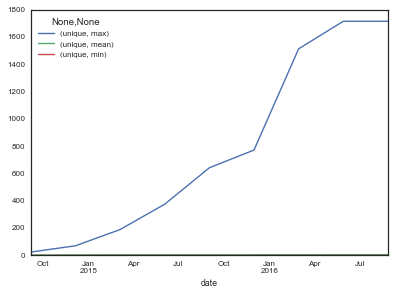

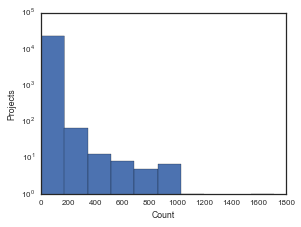

In [10]:
cases = [ regular, vernode]
labels = ["unique_spreading", "unique_vulnerability"]

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = '%s%%' % n
    return percentile_

for x in range(len(labels)):
       #plt.figure()
    #cases[x][["date", "unique"]].boxplot(by="date", showfliers=False, rot=90)
    #plt.show()
    print labels[x]
    print cases[x].sort_values("unique",ascending=False).head()
    plt.figure()
    growth = cases[x][["date", "unique"]].groupby("date").agg(["min", percentile(5), "mean","median",percentile(95),"max"  ]).reset_index()
    print growth.to_latex("../paper/tables/table_{0}_{1}.tex".format(labels[x], lang),float_format="%.2f",index=False)
    cases[x][["date", "unique"]].groupby("date").agg(["max", "mean","min"]).plot()
    plt.show()
    plt.figure(figsize=(4,3))
    plt.hist(cases[x][cases[x].date==cases[x].date.max()].unique.values)
    plt.xlabel("Count")
    plt.ylabel("Projects")
    plt.yscale("log")
    plt.tight_layout(0.1)
    plt.savefig("../paper/figures/distribution_latest_{0}_{1}.pdf".format(labels[x], lang))
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CD216D8>]], dtype=object)

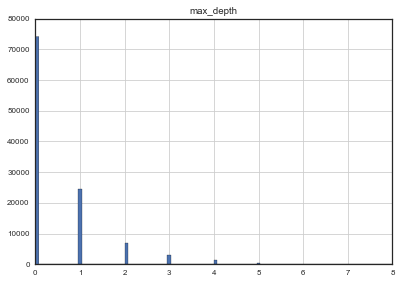

In [13]:
vernode[["max_depth"]].hist(bins=100)

# Other



In [ ]:
regular.sort_values(["unique"], ascending=False).head(30)

In [ ]:
vernode.sort_values(["unique"], ascending=False).head(30)